In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_excel('DJIA_Jan2016_Dec2016.xlsx')

In [3]:
df.head(60)
#change the row indices of the dataframe using the Date Column
df.index = df['Date']
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-01-04,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
2016-01-11,2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
2016-01-12,2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
2016-01-13,2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
2016-01-14,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000


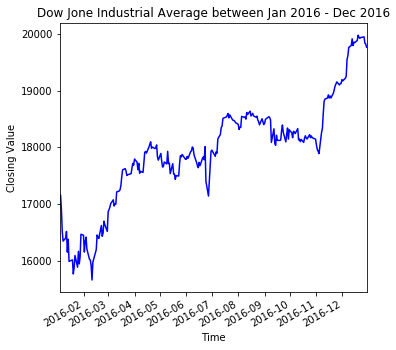

In [4]:
plt.figure(figsize=(5.5, 5.5))
df['Close'].plot(color='b')
plt.title('Dow Jone Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time')
plt.ylabel('Closing Value')
plt.savefig('timeseries.png', format='png', dpi=300)

In [5]:
lag = range(0,31)
dp = []
for l in lag:
    dp.append(df['Close'].autocorr(l))

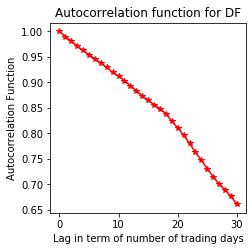

In [6]:
plt.figure(figsize=(3.5, 3.5))
plt.plot(dp, marker='*',color='r')
plt.title('Autocorrelation function for DF')
plt.xlabel('Lag in term of number of trading days')
plt.ylabel('Autocorrelation Function')
plt.savefig('timeseries2.png', format='png', dpi=300)

# plot autocorrelation and confidecne intervals unsing the plot_acf function 

<Figure size 396x396 with 0 Axes>

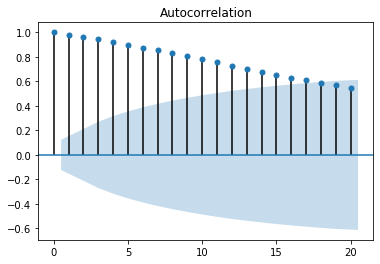

In [7]:
plt.figure(figsize=(5.5, 5.5))
plot_acf(df['Close'], lags=20)
plt.savefig('plot.png', format='png', dpi=300)

# Plot partial autocorrealtion and confidecne intervals unsing the Plot_acf function

<Figure size 396x396 with 0 Axes>

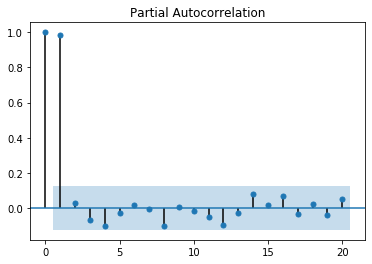

In [8]:
plt.figure(figsize=(5.5, 5.5))
plot_pacf(df['Close'], lags=20)
plt.savefig('plot.png', format='png', dpi=300)